In [292]:
import numpy as np
import pandas as pd

In [293]:
books = pd.read_csv('Books.csv')
ratings = pd.read_csv('Ratings.csv')
users = pd.read_csv('Users.csv')

<ipython-input-293-f6677f1956ea>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('Books.csv')


In [294]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [295]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [296]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [297]:
books.shape

(271360, 8)

In [298]:
ratings.shape

(1149780, 3)

In [299]:
users.shape

(278858, 3)

In [300]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

 so we got to know that there are non duplicated attributes in our database

In [301]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [302]:
books.duplicated().sum()

0

In [303]:
users.duplicated().sum()

0

In [304]:
ratings.duplicated().sum()

0

so we got to know that there are non duplicated attributes in our database

**EDA OF 3 DATA-BASES**

In [305]:
import matplotlib.pyplot as plt

In [306]:
plt.figure(figsize=(8, 6))

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

(0.0, 12.0)

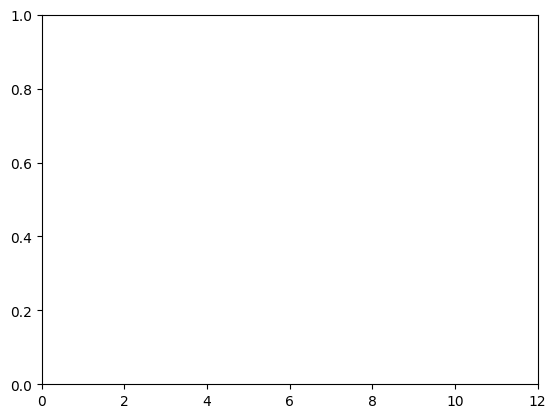

In [307]:
plt.xlim(0,12)

(0.0, 12.0)

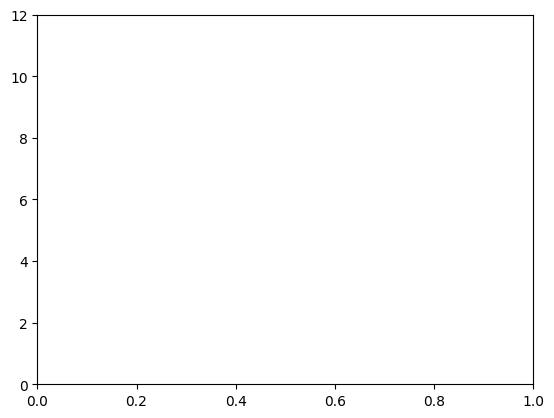

In [308]:
plt.ylim(0,12)

Text(0.5, 0, 'Books ISBN')

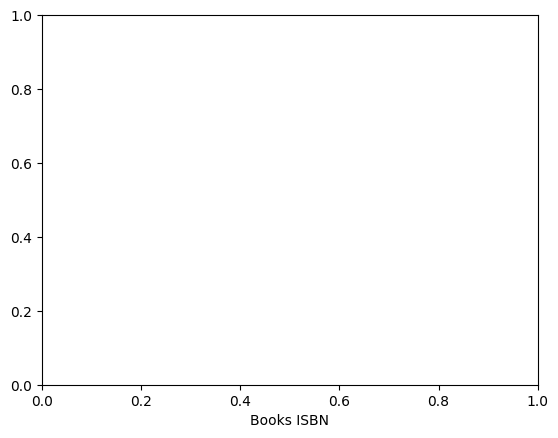

In [309]:
plt.xlabel('Books ISBN')

Text(0, 0.5, 'Ratings Book-Rating')

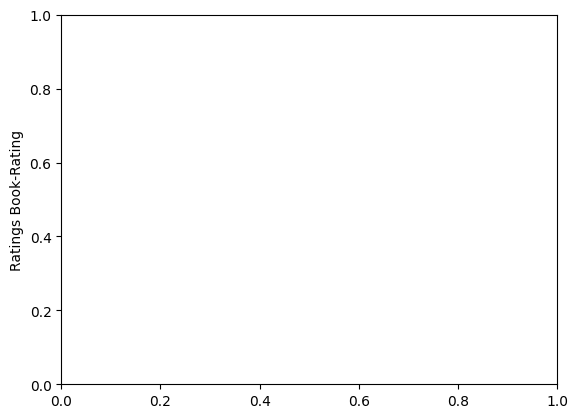

In [310]:
plt.ylabel('Ratings Book-Rating')

Text(0.5, 1.0, 'Plot between Books ISBN and Ratings Book-Rating')

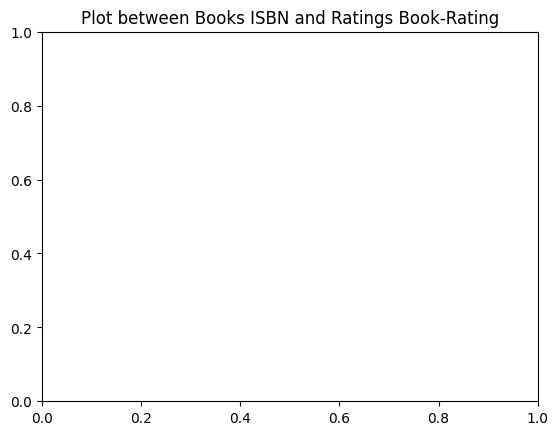

In [311]:
plt.title('Plot between Books ISBN and Ratings Book-Rating')

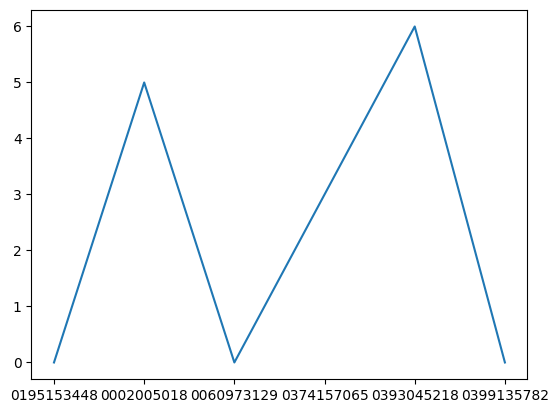

In [312]:
plt.plot(books['ISBN'][:6], ratings['Book-Rating'][:6])

**to plot the graph**

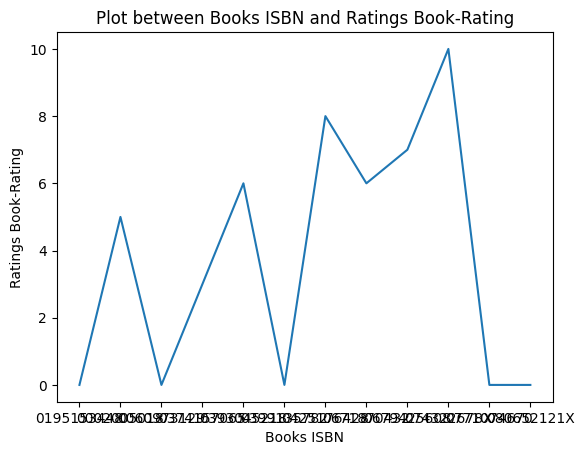

In [313]:
import matplotlib.pyplot as plt
# plt.figure(figsize=(8, 6))
# plt.xlim(0,12)
# plt.ylim(0,12)
plt.xlabel('Books ISBN')
plt.ylabel('Ratings Book-Rating')
plt.title('Plot between Books ISBN and Ratings Book-Rating')
plt.plot(books['ISBN'][:12], ratings['Book-Rating'][:12])
plt.show()

In [314]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


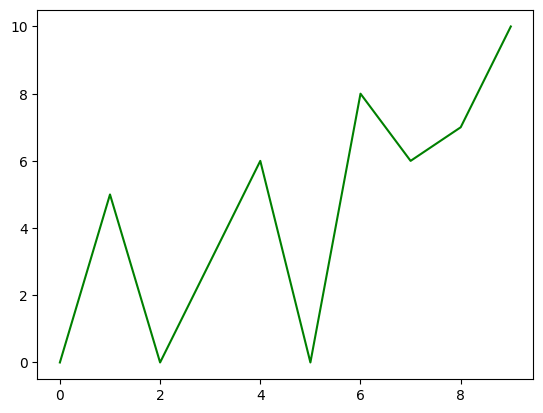

In [315]:
plt.plot(ratings['Book-Rating'][:10],color='green')

**POPULARITY BASED RECOMENDATION SYSTEM**

In [316]:
ratings_with_name = ratings.merge(books,on='ISBN')

In [317]:
ratings_with_name.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...


In [318]:
num_rating_df = ratings_with_name.groupby('Book-Title').count()['Book-Rating'].reset_index()

In [319]:
num_rating_df.rename(columns={'Book-Rating':'num-ratings'},inplace=True)

In [320]:
num_rating_df

,Book-Title,num-ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [321]:
avg_rating_df = ratings_with_name.groupby('Book-Title').mean()['Book-Rating'].reset_index()
avg_rating_df.rename(columns={'Book-Rating':'avg-ratings'},inplace=True)
avg_rating_df

<ipython-input-321-43a13da230ef>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_rating_df = ratings_with_name.groupby('Book-Title').mean()['Book-Rating'].reset_index()


,Book-Title,avg-ratings
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000
...,...,...
241066,Ã?Â?lpiraten.,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,5.250000
241068,Ã?Â?sterlich leben.,7.000000
241069,Ã?Â?stlich der Berge.,2.666667


In [322]:
popular_ratings = num_rating_df.merge(avg_rating_df,on='Book-Title')
popular_ratings

,Book-Title,num-ratings,avg-ratings
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
...,...,...,...
241066,Ã?Â?lpiraten.,2,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
241068,Ã?Â?sterlich leben.,1,7.000000
241069,Ã?Â?stlich der Berge.,3,2.666667


In [323]:
popular_books = popular_ratings[popular_ratings['num-ratings']>=250].sort_values('avg-ratings',ascending=False).head(50)

In [324]:
popular_books.shape

(50, 3)

In [325]:
popular_books = popular_books.merge(books,on='Book-Title').drop_duplicates('Book-Title')[['Book-Title','Book-Author','Year-Of-Publication','Image-URL-M','num-ratings','avg-ratings']]

In [326]:
popular_books.shape

(50, 6)

In [327]:
popular_books

,Book-Title,Book-Author,Year-Of-Publication,Image-URL-M,num-ratings,avg-ratings
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,1999,http://images.amazon.com/images/P/0439136350.0...,428,5.852804
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,2000,http://images.amazon.com/images/P/0439139597.0...,387,5.824289
5,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,1998,http://images.amazon.com/images/P/0590353403.0...,278,5.737410
9,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,2003,http://images.amazon.com/images/P/043935806X.0...,347,5.501441
13,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,2000,http://images.amazon.com/images/P/0439064872.0...,556,5.183453
16,The Hobbit : The Enchanting Prelude to The Lor...,J.R.R. TOLKIEN,1986,http://images.amazon.com/images/P/0345339681.0...,281,5.007117
17,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. TOLKIEN,1986,http://images.amazon.com/images/P/0345339703.0...,368,4.948370
26,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,1999,http://images.amazon.com/images/P/059035342X.0...,575,4.895652
28,"The Two Towers (The Lord of the Rings, Part 2)",J.R.R. TOLKIEN,1986,http://images.amazon.com/images/P/0345339711.0...,260,4.880769
39,To Kill a Mockingbird,Harper Lee,1988,http://images.amazon.com/images/P/0446310786.0...,510,4.700000


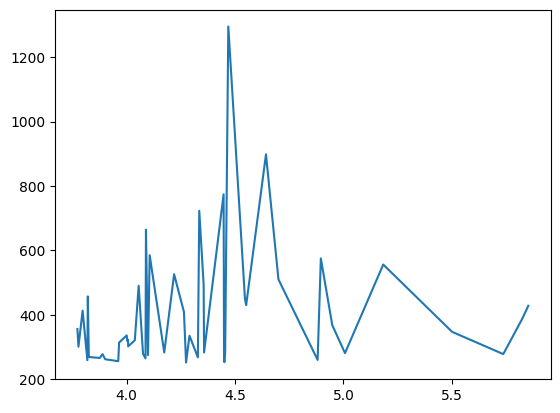

In [328]:
plt.plot(popular_books['avg-ratings'],popular_books['num-ratings'])

# **IMDB RECOMENDATION SYSTEM**

**W = RV + CM / V + M**<br>
**W = RATING**<br>
**R = MEAN**<br>
**V = NUMBER OF VOTES**<br>
**M = MINIMUM VOTES REQUIRED TO BE TOP 30 (250)**<br>
**C = MEAN VOTES ACROSS WHOLE REPORT**

In [329]:
w = []

In [330]:
c = popular_books['avg-ratings'].mean()
c

4.363746856514968

In [331]:
m = 250

In [332]:
v = popular_books['num-ratings']

In [333]:
r = popular_books['avg-ratings']

In [334]:
for i in range(len(v)):
    result = (r.iloc[i] * v.iloc[i] + 3.62 * 250) / (v.iloc[i] + m)
    w.append(result)


In [ ]:
w

In [336]:
dw = pd.DataFrame({'w': w}, index=range(len(w)))

In [337]:
dw

,w
0,5.029499
1,4.959184
2,4.734848
3,4.713568
4,4.698511
5,4.354049
6,4.411003
7,4.509091
8,4.262745
9,4.344737


In [338]:
popular_books.shape

(50, 6)

In [339]:
popular_books.reset_index(drop=True, inplace=True)
dw.reset_index(drop=True, inplace=True)

In [340]:
popular_books = pd.concat([popular_books,dw],axis=1)

In [341]:
popular_books.to_csv('new_file.csv', index=False)

In [342]:
popular_books

,Book-Title,Book-Author,Year-Of-Publication,Image-URL-M,num-ratings,avg-ratings,w
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,1999,http://images.amazon.com/images/P/0439136350.0...,428,5.852804,5.029499
1,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,2000,http://images.amazon.com/images/P/0439139597.0...,387,5.824289,4.959184
2,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,1998,http://images.amazon.com/images/P/0590353403.0...,278,5.737410,4.734848
3,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,2003,http://images.amazon.com/images/P/043935806X.0...,347,5.501441,4.713568
4,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,2000,http://images.amazon.com/images/P/0439064872.0...,556,5.183453,4.698511
5,The Hobbit : The Enchanting Prelude to The Lor...,J.R.R. TOLKIEN,1986,http://images.amazon.com/images/P/0345339681.0...,281,5.007117,4.354049
6,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. TOLKIEN,1986,http://images.amazon.com/images/P/0345339703.0...,368,4.948370,4.411003
7,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,1999,http://images.amazon.com/images/P/059035342X.0...,575,4.895652,4.509091
8,"The Two Towers (The Lord of the Rings, Part 2)",J.R.R. TOLKIEN,1986,http://images.amazon.com/images/P/0345339711.0...,260,4.880769,4.262745
9,To Kill a Mockingbird,Harper Lee,1988,http://images.amazon.com/images/P/0446310786.0...,510,4.700000,4.344737


In [343]:
popular_books.shape

(50, 7)